# Analysis of 1D Effective Potential and Friedel Oscilations

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from dgutils import colors as col
import dgutils

import os
from numpy import pi as π
from scipy import integrate
from scipy.constants import hbar as ħ
from scipy.constants import k

# Notebook display options
%config InlineBackend.figure_format = 'svg'
#%matplotlib.display inline

# plot style
plot_style = {'aps':'../include/aps.mplstyle', 'notebook':'../include/notebook.mplstyle', 
              'sans':'../include/sans.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])

figsize = plt.rcParams['figure.figsize']

π = np.pi
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
L = 100.0
δR = np.array([0.0,-1.5,-2.0,-2.5,-3.0,-4.0])
num_pores = len(δR)

ρ,V = [],[]
for cδR in δR:
    ρ.append(np.loadtxt(os.getenv('HOME') + '/Dropbox/UTK/Projects/NanoporeMassFlow/HourGlass/data_2018/R_eq_12.0/dR_eq_%+4.1f/d_eq_1.5/Random_HourGlass_IC/MERGED/CYLINDER/linedensity-T-reduce-t-0.00400-u--007.200-L-100.000.dat' % cδR))
    V.append(np.loadtxt(os.getenv('HOME') + '/Dropbox/UTK/Projects/NanoporeMassFlow/HourGlass/data_2018/R_eq_12.0/dR_eq_%+4.1f/d_eq_1.5/Random_HourGlass_IC/MERGED/CYLINDER/linepotential-T-reduce-t-0.00400-u--007.200-L-100.000.dat' % cδR))
    

#Canonical
# ρ.append(np.loadtxt(os.getenv('HOME') + '/Dropbox/UTK/Projects/NanoporeMassFlow/HourGlass/data_2018/R_eq_12.0/dR_eq_-3.0/d_eq_1.5/Random_HourGlass_IC/MERGED/CYLINDER/linedensity-T-reduce-N-0950-n-00.021-t-0.00400.dat'))
# V.append(np.loadtxt(os.getenv('HOME') + '/Dropbox/UTK/Projects/NanoporeMassFlow/HourGlass/data_2018/R_eq_12.0/dR_eq_-3.0/d_eq_1.5/Random_HourGlass_IC/MERGED/CYLINDER/linepotential-T-reduce-N-0950-n-00.021-t-0.00400.dat'))
# δR = np.append(δR,-3.001)
# num_pores += 1

colors = dgutils.colors.get_linear_colors('Spectral',num_pores)

## Make Things Symmetric around $x=0$

In [5]:
for i in range(num_pores):
    ρ[i][:,0] -= 0.5*L
    V[i][:,0] -= 0.5*L

## Density Oscillations

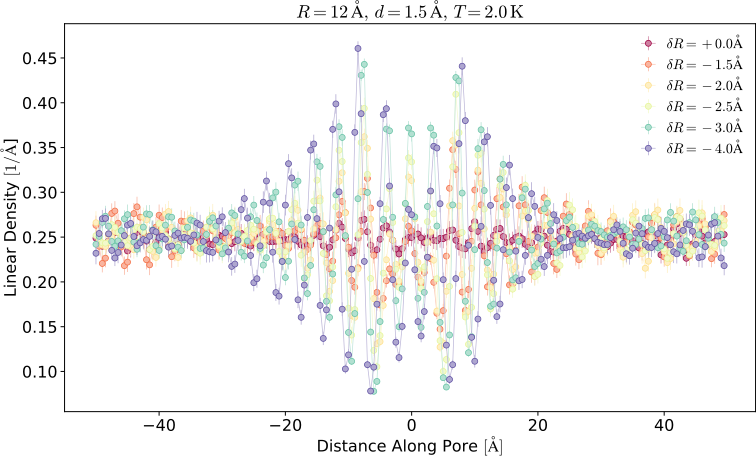

In [6]:
plt.style.reload_library()
with plt.style.context(('notebook')):
    plt.figure(figsize=(12,7))

    for i in range(num_pores):
        plt.errorbar(ρ[i][:,0],ρ[i][:,1],yerr=ρ[i][:,2], markeredgecolor=colors[i], markeredgewidth=0.75, 
                 markerfacecolor=col.get_alpha_hex(colors[i],0.5), color=col.get_alpha_hex(colors[i],0.4), 
                 ecolor=col.get_alpha_hex(colors[i],0.5),
                 elinewidth=0.75, linewidth=0.75, marker='o', markersize=6, label=r'$\delta R = %+4.1f \mathrm{\AA}$'%δR[i])

    plt.legend()
    plt.title(r'$R = 12\, \mathrm{\AA},\, d = 1.5\, \mathrm{\AA},\, T = 2.0\, \mathrm{K}$')
    plt.ylabel('Linear Density $[1/\mathrm{\AA}$]')
    plt.xlabel('Distance Along Pore $[\mathrm{\AA}]$')
    #plt.savefig('Output/linear_density_R_12.0_d_1.5_T_2.0.png')


#     plt.figure(figsize=(12,7))

#     for i in range(num_pores):
#         plt.plot(ρ[i][:,0],ρ[i][:,1], marker='None', color=colors[i], linewidth=2,
#                  label=r'$\delta R = %+4.1f \mathrm{\AA}$'%δR[i])

#     plt.legend()
#     plt.title(r'$R = 12\, \mathrm{\AA},\, d = 1.5\, \mathrm{\AA},\, T = 2.0\, \mathrm{K}$')
#     plt.ylabel('Linear Density $[1/\mathrm{\AA}$]')
#     plt.xlabel('Distance Along Pore $[\mathrm{\AA}]$')
#    plt.savefig('Output/linear_density_R_12.0_d_1.5_T_2.0.png')

## Total number of particles and the average density

In [7]:
N = np.zeros(len(ρ))
ρₒ = np.zeros_like(N)
for i in range(num_pores):
    N[i] = integrate.simps(ρ[i][:,1],x=ρ[i][:,0])
    ρₒ[i] = N[i]/L

print("N = ",N)
print("ρₒ = ",ρₒ)

N =  [24.61225565 24.51063349 24.65143596 24.74675812 25.18716434 24.44057831]
ρₒ =  [0.24612256 0.24510633 0.24651436 0.24746758 0.25187164 0.24440578]


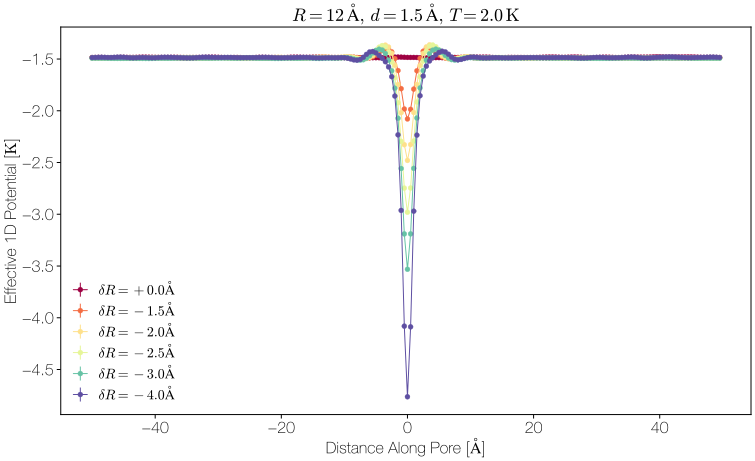

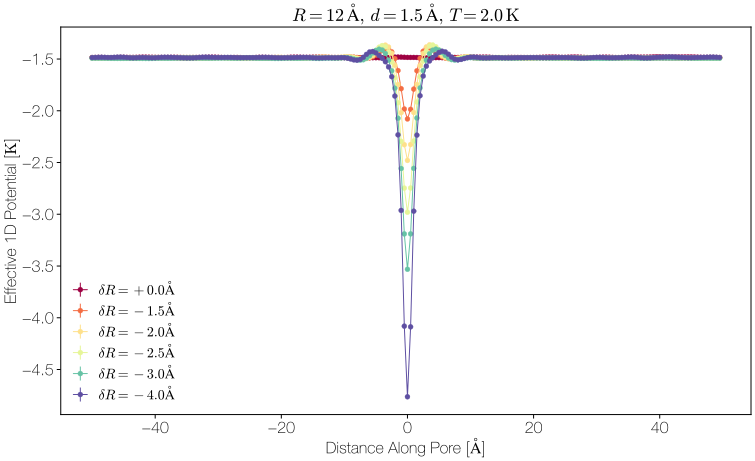

In [9]:
plt.style.reload_library()
with plt.style.context(('notebook')):
    plt.figure(figsize=(12,7))

    for i in range(num_pores):
        plt.errorbar(V[i][:,0],(V[i][:,1]),yerr=V[0][:,2], color=colors[i], linewidth=1, marker='o', 
                     markersize=5, label=r'$\delta R = %+4.1f \mathrm{\AA}$'%δR[i])

    plt.legend()
    #plt.ylim(-5,0)
    plt.title(r'$R = 12\, \mathrm{\AA},\, d = 1.5\, \mathrm{\AA},\, T = 2.0\, \mathrm{K}$')
    plt.ylabel('Effective 1D Potential $[\mathrm{K}]$')
    plt.xlabel('Distance Along Pore $[\mathrm{\AA}]$')
    plt.show()
    #plt.savefig('Output/V1d_R_12.0_d_1.5_T_2.0.png')


## Fourier Transform of the Potential

We are interested to know if there is any Fourier component of the potential at $2 k_F = 2\pi \rho_0$.

In [7]:
Δx = V[0][1,0]-V[0][0,0]
num_x = len(V[0][:,0])

V̂ = [0]*len(δR)
k = 2*π*np.fft.rfftfreq(V[0][:,0].size,Δx)
kF = π*ρₒ
 
for i in range(num_pores):
    V̂[i] = np.cos(0.5*L*k)*np.fft.rfft(V[i][:,1]-V[i][-1,1])*Δx


In [8]:
vₘ = [0]*len(δR)
for i,ckF in enumerate(kF):
    vₘ[i] = np.real(V̂[i][np.where(2*ckF-k < 0.05)[0]][0])*ρₒ[i]
    print('v(2πρₒ) = %8.5f'%vₘ[i],'at δR = %3.1f'%δR[i])
vₘ = np.array(vₘ)

v(2πρₒ) = -0.00510 at δR = 0.0
v(2πρₒ) = -0.11571 at δR = -1.5
v(2πρₒ) = -0.17055 at δR = -2.0
v(2πρₒ) = -0.24805 at δR = -2.5
v(2πρₒ) = -0.34485 at δR = -3.0
v(2πρₒ) = -0.67669 at δR = -4.0


In [13]:
plt.style.reload_library()
with plt.style.context(('notebook')):
    plt.figure(figsize=(12,7))
    plt.plot(δR,np.abs(vₘ),'o-')
    plt.xlabel('$\delta R\,   [\mathrm{\AA}]$')
    plt.ylabel('$|\hat{V}(2k_{F})|\,  [\mathrm{K}]$')
    plt.savefig('Output/V2kf_R_12.0_d_1.5_T_2.0.png')

FileNotFoundError: [Errno 2] No such file or directory: 'Output/V2kf_R_12.0_d_1.5_T_2.0.png'

In [11]:
plt.style.reload_library()
with plt.style.context(('notebook')):
    plt.figure(figsize=(12,7))
    plt.axvline(x=2, color='gray', alpha=0.2)
    for i in range(num_pores):
        plt.plot(k/kF[i],V̂[i].real, label=r'$\delta R = %4.1f \mathrm{\AA}$'%δR[i], 
                 linestyle='-', linewidth=1, marker='o', markersize=5, color=colors[i])
        label1 =r'$\rho_0 = %5.3f\, \mathrm{\AA}^{-1}$' % ρₒ[i] 
        label2 = r'$\rho_0|\hat{V}(2\pi\rho_0)| = %5.3f\, \mathrm{K}$' % vₘ[i]
        #plt.text(0.02,np.abs(V̂[i][0])+shift1[i],label1, color=colors[i], fontsize=18)
        #$plt.text(2.0+shiftlr[i],np.abs(vₘ[i]/ρₒ[i])+shift2[i],label2, color=colors[i], fontsize=18)


    plt.legend()
    plt.title(r'$R = 12\, \mathrm{\AA},\, d = 1.5\, \mathrm{\AA},\, T = 2.0\, \mathrm{K}$')
    plt.ylabel(r'$\hat{V}(k)\,\, [K \, \mathrm{\AA}]$')
    plt.xlabel(r'$k/\pi\rho_0$')

    #plt.xlim(0,3);
    #plt.ylim(0,8);

    #plt.savefig('Output/Vk_R_12.0_d_1.5_T_2.0.png')

## Investigate Friedel Oscillations

In [24]:
from scipy.special import beta as B
from scipy.special import exp1

def δρPBC(x,K,y,a):
    α = a*K/(2*π)
    cx = (L/π)*np.sin(π*np.abs(x) / L)
    
    return 2**(2/K) * (K/2) * y * B(0.5,1.0/K-0.5) * (1+cx/α)**(1.0-2.0/K) *np.cos(2.0*π*x/a)

def δρPBC_envelope(x,K,y,a):
    α = a*K/(2*π)
    cx = (L/π)*np.sin(π*np.abs(x) / L)

    return (1.0/a) * 2**(2/K) * (K/2) * y * B(0.5,1.0/K-0.5) * (1+cx/α)**(1.0-2.0/K)

def δρoρₒPBC_envelope(x,K,y,a):
    α = a*K/(2*π)
    cx = (L/π)*np.sin(π*np.abs(x) / L)

    return 2**(2/K) * (K/2) * y * B(0.5,1.0/K-0.5) * (1+cx/α)**(1.0-2.0/K)

### This part is for strong scatterers
def P(x,K,xₒ):
    return np.exp(-(1/K)*np.exp(x/xₒ +1)*exp1(x/xₒ+1))

def δρ_strong(x,xₒ,a,K):
    cx = (L/π)*np.sin(π*np.abs(x) / L)
    α = a*K/(2*π)

    return -P(cx,K,xₒ)*(1.0+cx/α)**(-1/K)*np.cos(2.0*π*x/a)

def δρ_strong_asymptotic(x,a,K):
    cx = (L/π)*np.sin(π*np.abs(x) / L)
    α = a*K/(2*π)

    return (1.0+cx/α)**(-1/K)

def δρ_strong_envelope(x,xₒ,a,K):
    cx = (L/π)*np.sin(π*np.abs(x) / L)
    α = a*K/(2*π)

    return P(cx,K,xₒ)*(1.0+cx/α)**(-1/K)
    

## Investigate the theoretical form of the scattering

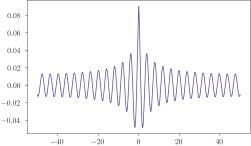

In [25]:
i = 4
u = 10.3
x = np.linspace(-0.5*L,0.5*L,1000)

K = 1.3
a = 1.0/ρₒ[i]
y = vₘ[i]/(2*u)

plt.plot(x,δρPBC(x,K,0.01,a))

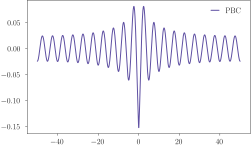

In [26]:
#plt.plot(x,δρ(x,K,y,5), linewidth=1, label='OBC')
plt.plot(x,δρPBC(x,K,y,5), linewidth=1, label='PBC')

#plt.plot(x,δρ(x,K,y,0.217), linewidth=1, label='a=0.217')
plt.legend()

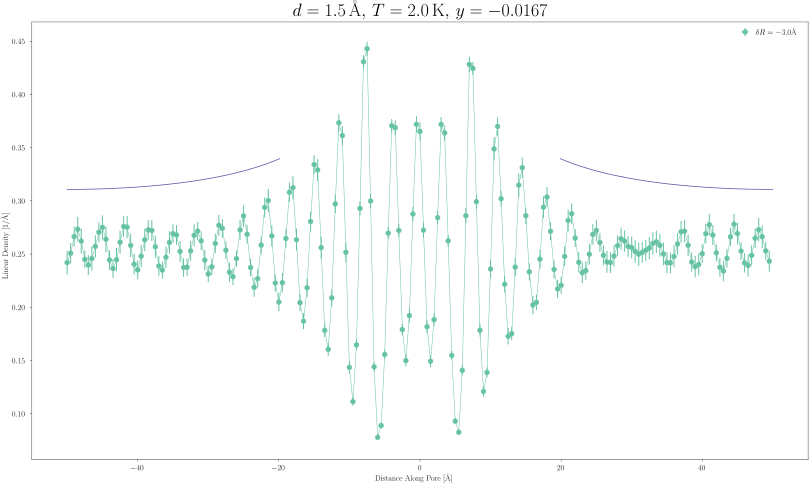

In [32]:
plt.figure(figsize=(12,7))

pore_id = 4
x = np.linspace(-0.5*L,0.5*L,1000)
K = 1.3
a = 1.0/ρₒ[pore_id]
u = 10.3
y = vₘ[pore_id]/(2*u)

# Create a masked array 
x = np.linspace(-0.5*L,0.5*L,1000)
friedel = δρPBC(x,K,y,a) + 1.0/a
m_x = np.ma.masked_inside(x, -5*a, 5*a)
m_x_L = np.ma.masked_greater(x,-5*a)
m_x_R = np.ma.masked_less(x,5*a)

m_friedel = np.ma.array(friedel, mask=m_x.mask)

m_x_data = np.ma.masked_inside(ρ[pore_id][:,0], -6*a,6*a)
m_ρ = np.ma.array(ρ[pore_id][:,1], mask=m_x_data.mask)
m_ρ_err = np.ma.array(ρ[pore_id][:,2], mask=m_x_data.mask)

m_x_data_R = ρ[pore_id][-50:,0]
m_ρ_R = ρ[pore_id][-50:,1]
m_ρ_err_R = ρ[pore_id][-50:,2]
m_ρ_friedel_R = δρPBC(m_x_data_R,K,y,a) + 1.0/a

m_x_data_L = ρ[pore_id][:50,0]
m_ρ_L = ρ[pore_id][:50,1]
m_ρ_err_L = ρ[pore_id][:50,2]
m_ρ_friedel_L = δρPBC(m_x_data_L,K,y,a) + 1.0/a

plt.errorbar(ρ[pore_id][:,0],ρ[pore_id][:,1],yerr=ρ[pore_id][:,2], color=colors[pore_id], 
             elinewidth=1, linewidth=0.5, marker='o', markersize=5, 
             label=r'$\delta R = %4.1f \mathrm{\AA}$'%δR[pore_id])

#plt.plot(m_x,m_friedel, label='Friedel', color=colors[pore_id], linewidth=1)
#plt.plot(m_x_data_R,m_ρ_friedel_R, label='Friedel', color=colors[pore_id], linewidth=3)
#plt.plot(m_x_data_L,m_ρ_friedel_L, label='Friedel', color=colors[pore_id], linewidth=3)


plt.plot(m_x,δρ_strong_asymptotic(m_x,a,K)+1/a)
#plt.ylim(0.22,0.28)

plt.legend()
plt.title(r'$d = 1.5\, \mathrm{\AA},\, T = 2.0\, \mathrm{K},\, y = %4.4f$' % y);
plt.ylabel('Linear Density $[1/\mathrm{\AA}$]');
plt.xlabel('Distance Along Pore $[\mathrm{\AA}]$');

100.0

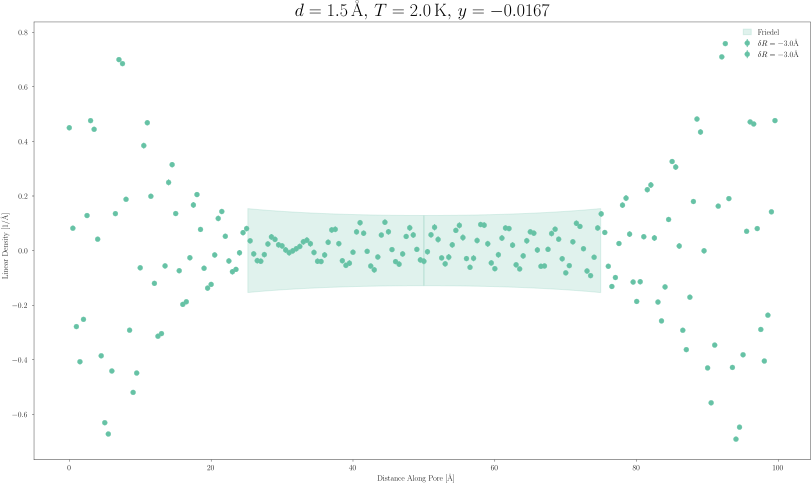

In [33]:
plt.figure(figsize=(12,7))

pore_id = 4
x = np.linspace(-0.5*L,0.5*L,1000)
K = 1.3
a = 1.0/ρₒ[pore_id]
u = 10.3
y = vₘ[pore_id]/(2*u)

n_points = 200

m_ρ_friedel_L = δρoρₒPBC_envelope(x,K,0.1,a)

plt.errorbar(ρ[pore_id][int(n_points/2):,0],ρ[pore_id][int(n_points/2):,1]/ρₒ[pore_id]-1,yerr=ρ[pore_id][int(n_points/2):,2], color=colors[pore_id], 
             elinewidth=1, linewidth=0.0, marker='o', markersize=5, 
             label=r'$\delta R = %4.1f \mathrm{\AA}$'%δR[pore_id])

plt.errorbar(ρ[pore_id][:int(n_points/2):1,0]+L,ρ[pore_id][:int(n_points/2):1,1]/ρₒ[pore_id]-1,yerr=ρ[pore_id][:int(n_points/2):1,2], color=colors[pore_id], 
             elinewidth=1, linewidth=0.0, marker='o', markersize=5, 
             label=r'$\delta R = %4.1f \mathrm{\AA}$'%δR[pore_id])

plt.fill_between(x[:750:-1],-m_ρ_friedel_L[:249],m_ρ_friedel_L[:249], label='Friedel', color=colors[pore_id], linewidth=1, alpha=0.2)
plt.fill_between(x[:250]+L,-m_ρ_friedel_L[:250],m_ρ_friedel_L[:250], color=colors[pore_id], linewidth=1, alpha=0.2)

#plt.ylim(-0.1,0.1)
plt.legend()
plt.title(r'$d = 1.5\, \mathrm{\AA},\, T = 2.0\, \mathrm{K},\, y = %4.4f$' % y);
plt.ylabel('Linear Density $[1/\mathrm{\AA}$]');
plt.xlabel('Distance Along Pore $[\mathrm{\AA}]$');

In [139]:
y

-0.0166156644322817

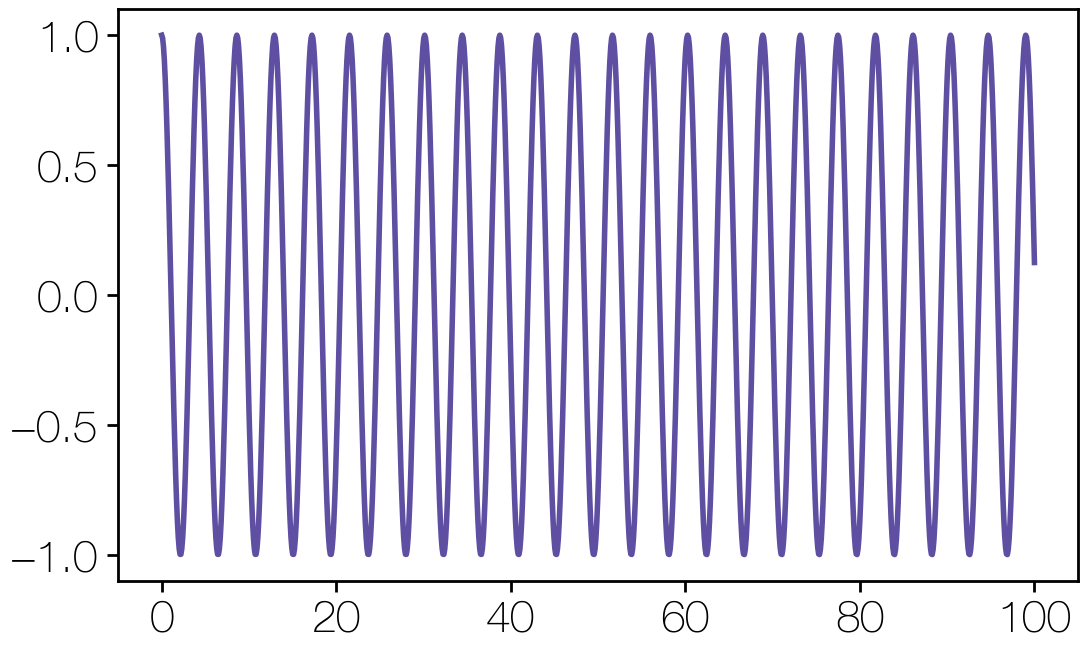

In [101]:
cx = (L/π)*np.sin(π*np.abs(x) / L)
plt.plot(x,np.cos(2*π*0.2323*x))

## Plot the envelope

In [42]:
from scipy.signal import argrelextrema

max_vals = []
min_vals = []
for i in range(num_pores):
    max_vals.append(argrelextrema(ρ[i][:,1], np.greater)[0])
    min_vals.append(argrelextrema(ρ[i][:,1], np.less)[0]) 

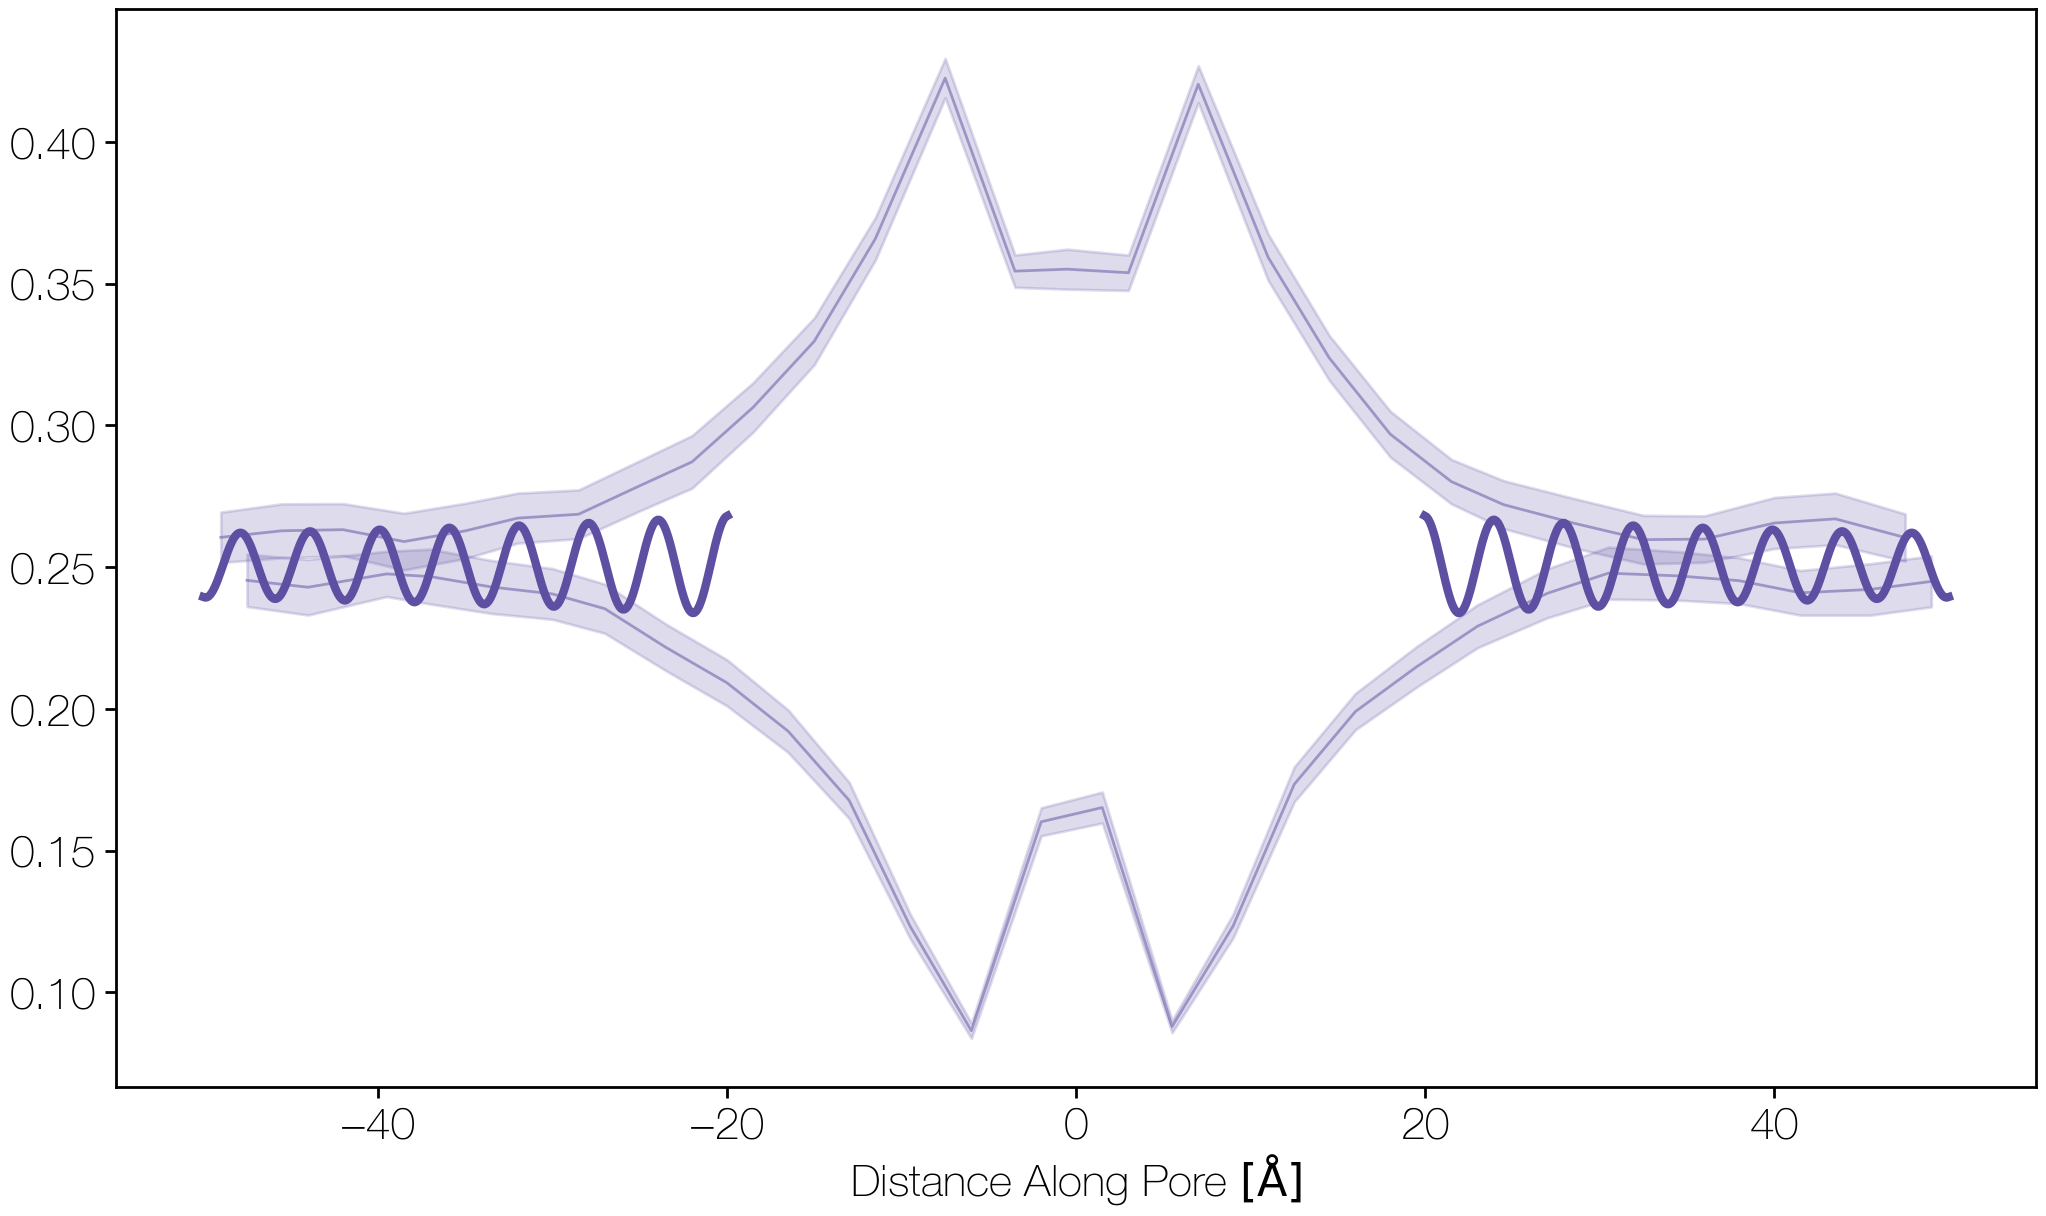

In [43]:
with plt.style.context(('notebook')):
    plt.figure(figsize=(12,7))
    plt.fill_between(ρ[pore_id][max_vals[pore_id],0], 
                     ρ[pore_id][max_vals[pore_id],1]-ρ[pore_id][max_vals[pore_id],2], 
                     ρ[pore_id][max_vals[pore_id],1]+ρ[pore_id][max_vals[pore_id],2],
                     color=colors[pore_id], alpha=0.2)
    
    plt.fill_between(ρ[pore_id][min_vals[pore_id],0], 
                     ρ[pore_id][min_vals[pore_id],1]-ρ[pore_id][min_vals[pore_id],2], 
                     ρ[pore_id][min_vals[pore_id],1]+ρ[pore_id][min_vals[pore_id],2],
                     color=colors[pore_id], alpha=0.2)
    
    plt.plot(m_x,m_friedel, label='Friedel', color=colors[pore_id], linewidth=3)
    
    plt.plot(ρ[pore_id][max_vals[pore_id],0],ρ[pore_id][max_vals[pore_id],1],
             label=r'$\delta R = %4.1f \mathrm{\AA}$'%δR[pore_id], color=colors[pore_id], linewidth=1, alpha=0.5)
    plt.plot(ρ[pore_id][min_vals[pore_id],0],ρ[pore_id][min_vals[pore_id],1],
             label=r'$\delta R = %4.1f \mathrm{\AA}$'%δR[pore_id], color=colors[pore_id], linewidth=1, alpha=0.5)


    #plt.ylabel('Linear Density Envelope $[1/\mathrm{\AA}$]')
    plt.xlabel('Distance Along Pore $[\mathrm{\AA}]$')
    #plt.legend()

## Fit to the Friedel Oscillations

***NB*** free-fitting the pre-factor $\eta$ seems to make things difficult.

In [17]:
from scipy.optimize import curve_fit

def make_fit_ρ(K,a,y):
    def fit_ρ(x,*p):
        η = p[0]
        ρ = p[1]
        ϕ = p[2]
        a = 1/ρ
        
        L = 100.0
        
        #cx = x
        cx = (L/π)*np.sin(π*np.abs(x) / L)
    
        return -(1.0/a)*((2**(2/K))/K) * η * y * B(0.5,1.0/K-0.5)*\
                (1+cx/(η*a))**(1-2.0/K) * np.cos(2.0*π*x/a + ϕ) + 1.0/a
    return fit_ρ

def make_fit_test(a):
    def fit_test(x,*p):
        η = p[0]
        ϕ = p[1]
    
        return  η*np.cos(2.0*π*x/a + ϕ)/a + 1/a
    return fit_test


In [18]:
#p,p_cov = curve_fit(make_fit_test(a),m_x_data,m_ρ,sigma=m_ρ_err, 
#                    p0=(0.8,0.05), bounds=[[0.0,0.05],[1,2*π]], absolute_sigma=True)

#p1,p1_cov = curve_fit(make_fit_ρ(K,a,y),m_x_data,m_ρ,sigma=m_ρ_err, 
#                      p0=(2.0,1/a), bounds=[[0.5,0.0],[5.01,5/a]], absolute_sigma=True)

pR,pR_cov = curve_fit(make_fit_ρ(K,a,y),m_x_data_R,m_ρ_R,sigma=m_ρ_err_R, 
                      p0=(1.0,1/a,0.005), bounds=[[0.99,0.0,0.0],[1.101,1.0,0.01]], absolute_sigma=True)

pL,pL_cov = curve_fit(make_fit_ρ(K,a,y),m_x_data_L,m_ρ_L,sigma=m_ρ_err_L, 
                      p0=(1.0,1/a,0.25), bounds=[[0.9,0.0,0.0],[1.1,1.0,2*π]], absolute_sigma=True)
#print(p)
#print(np.sqrt(np.diagonal(p_cov)))

print(pR)
print(np.sqrt(np.diagonal(pR_cov)))

print(pL)
print(np.sqrt(np.diagonal(pL_cov)))

[9.90000000e-01 2.46600966e-01 1.21842451e-17]
[0.09072394 0.00121295 0.30418592]
[0.9        0.25101057 1.22762809]
[0.09138411 0.00120315 0.30024283]


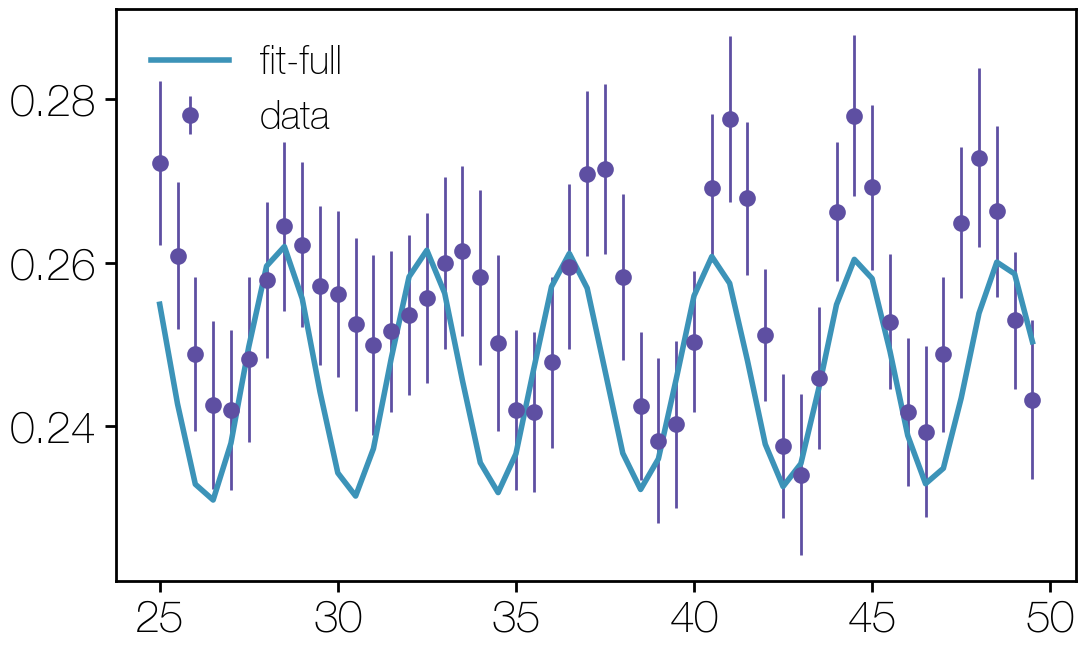

In [19]:
plt.errorbar(m_x_data_R,m_ρ_R,yerr=m_ρ_err_R, linewidth=0, markersize=5, marker='o', label='data', elinewidth=1)
plt.plot(m_x_data_R,make_fit_ρ(K,a,y)(m_x_data_R,*pR), label='fit-full')
#plt.plot(m_x_data,make_fit_test(a)(m_x_data,*p), label='fit-test')
plt.legend()

In [20]:
def χ2(x,y,Y,σ=np.array([])):
    '''Return the value of χ².'''
    if σ.any():
        return np.sum(((Y-y)/σ)**2)
    else: 
        return np.sum((Y-y)**2)
    
print(χ2(m_x_data_R,m_ρ_R,make_fit_ρ(K,a,y)(m_x_data_R,*(1,1/a,0)),σ=m_ρ_err_R))
print(χ2(m_x_data_R,m_ρ_R,make_fit_ρ(K,a,y)(m_x_data_R,*pR),σ=m_ρ_err_R))

150.2584389815464
80.75397340325118


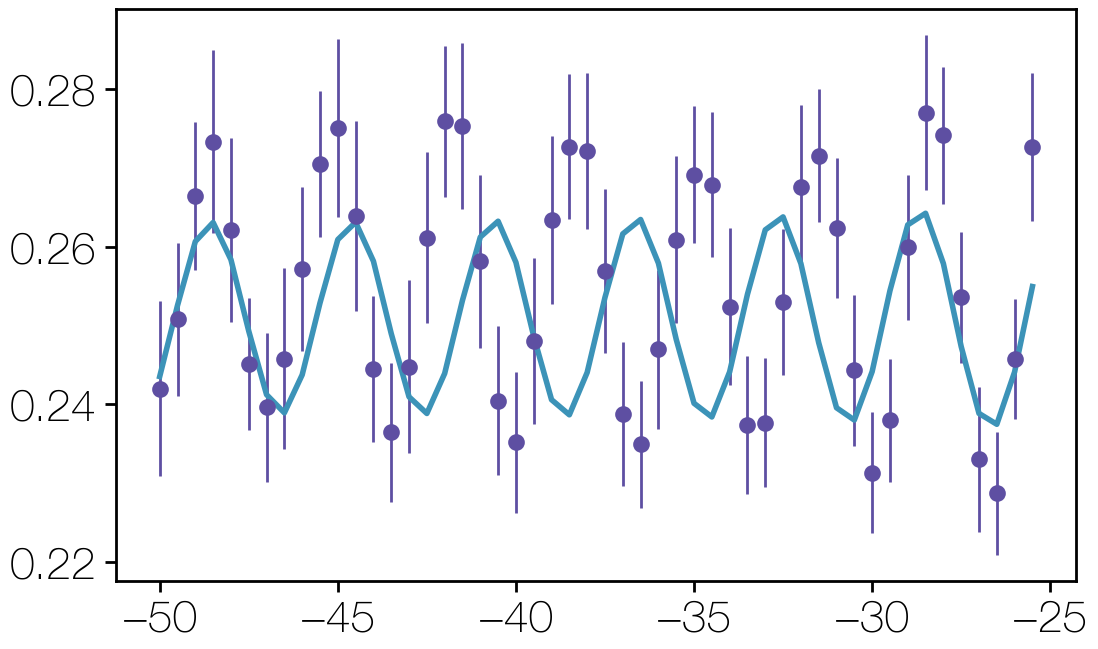

In [21]:
plt.errorbar(m_x_data_L,m_ρ_L,yerr=m_ρ_err_L, linewidth=0, markersize=5, marker='o', label='data', elinewidth=1)
plt.plot(m_x_data_L,make_fit_ρ(K,a,y)(m_x_data_L,*pL), label='fit-full')

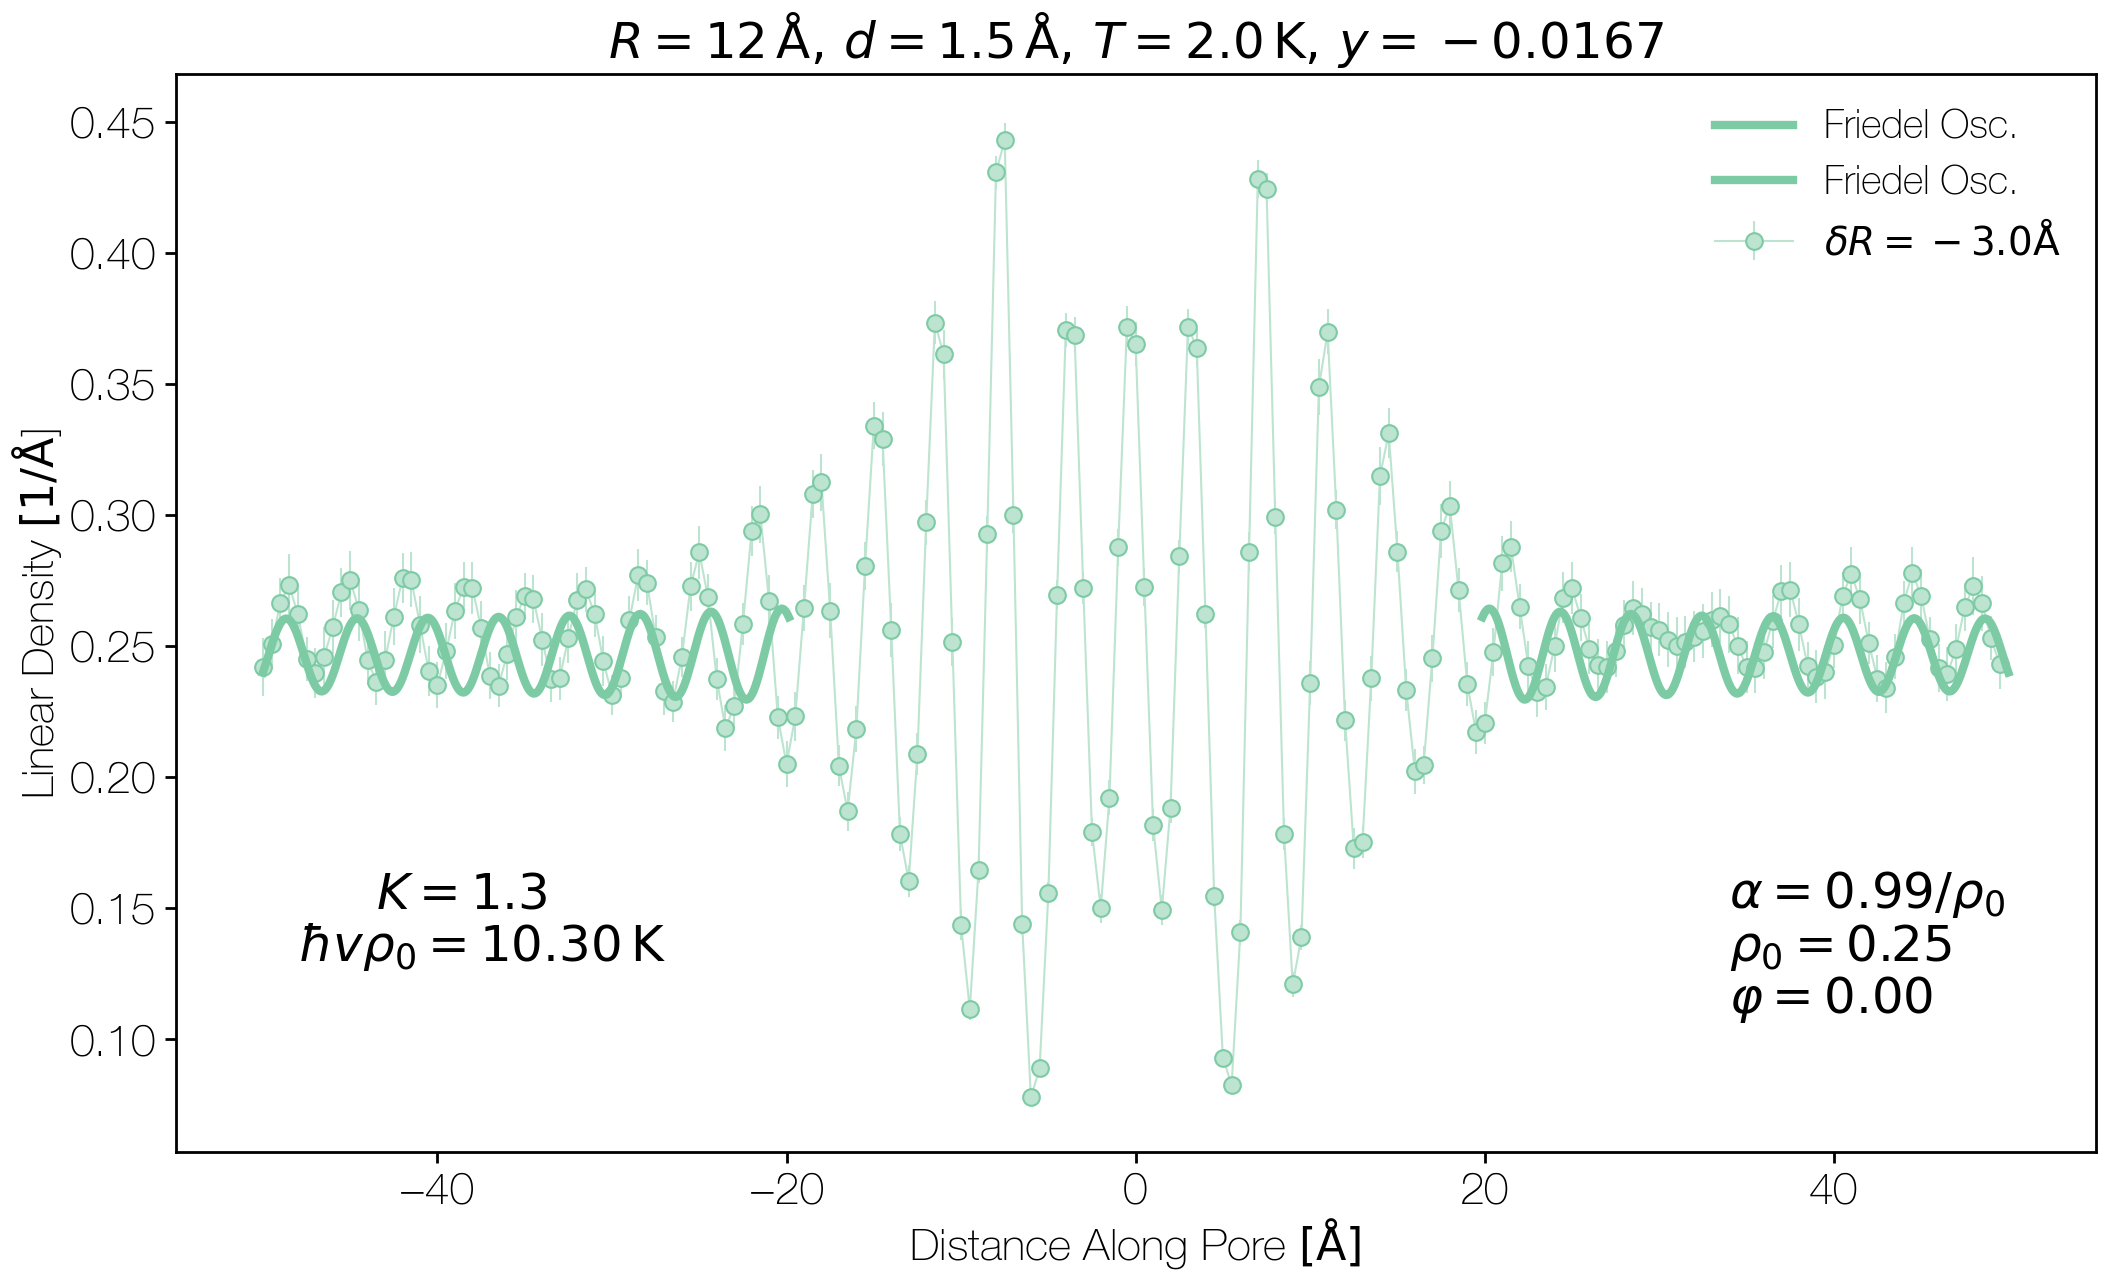

In [22]:
plt.style.reload_library()
with plt.style.context(('notebook')):

    plt.figure(figsize=(12,7))

    plt.errorbar(ρ[pore_id][:,0],ρ[pore_id][:,1],yerr=ρ[pore_id][:,2], markeredgecolor=colors[pore_id], 
                 markeredgewidth=0.75, markerfacecolor=col.get_alpha_hex(colors[pore_id],0.5),
                 color=col.get_alpha_hex(colors[pore_id],0.5), elinewidth=0.75, linewidth=0.75, 
                 marker='o', markersize=6, label=r'$\delta R = %4.1f \mathrm{\AA}$'%δR[pore_id])
    #plt.fill_between(ρ[i][:,0], ρ[i][:,1]-ρ[i][:,2], ρ[i][:,1]+ρ[i][:,2], color=colors[i], alpha=0.1)

    plt.plot(m_x_R,make_fit_ρ(K,a,y)(m_x_R,*pR), label='Friedel Osc.', color=colors[pore_id], 
             linewidth=3, zorder=20)
    plt.plot(m_x_L,make_fit_ρ(K,a,y)(m_x_L,*pR), label='Friedel Osc.', color=colors[pore_id], 
             linewidth=3, zorder=20)

#    plt.plot(m_x_data,m_ρ_friedel, label='Friedel Nofit', color=colors[pore_id], linewidth=1)

    plt.legend()
    plt.title(r'$R = 12\, \mathrm{\AA},\, d = 1.5\, \mathrm{\AA},\, T = 2.0\, \mathrm{K},\, y = %8.4f$' % y)
    plt.text(34,0.15,r"$\alpha = %4.2f/\rho_0$" % pR[0], fontsize=18)
    plt.text(34,0.13,r"$\rho_0 = %4.2f$" % pR[1], fontsize=18)
    plt.text(34,0.11,r"$\varphi = %4.2f$" % pR[2], fontsize=18)


    plt.text(-43.5,0.15,r"$K = %4.1f$" % K, fontsize=18)
    plt.text(-48,0.13,r"$\hbar v \rho_0 = %4.2f\, \mathrm{K}$" % u, fontsize=18)


    plt.ylabel('Linear Density $[1/\mathrm{\AA}$]')
    plt.xlabel('Distance Along Pore $[\mathrm{\AA}]$')
    #plt.xlim(0,0.5*L);
    plt.savefig('Output/Friedel_R_12.0_d_1.5_T_2.0.png')

In [23]:
def R(z,L,δR,d,R0):
    return -δR*(np.tanh(z/d)/np.tanh(L/(2*d)))**2 + R0 + δR

(-13.0, 13.0)

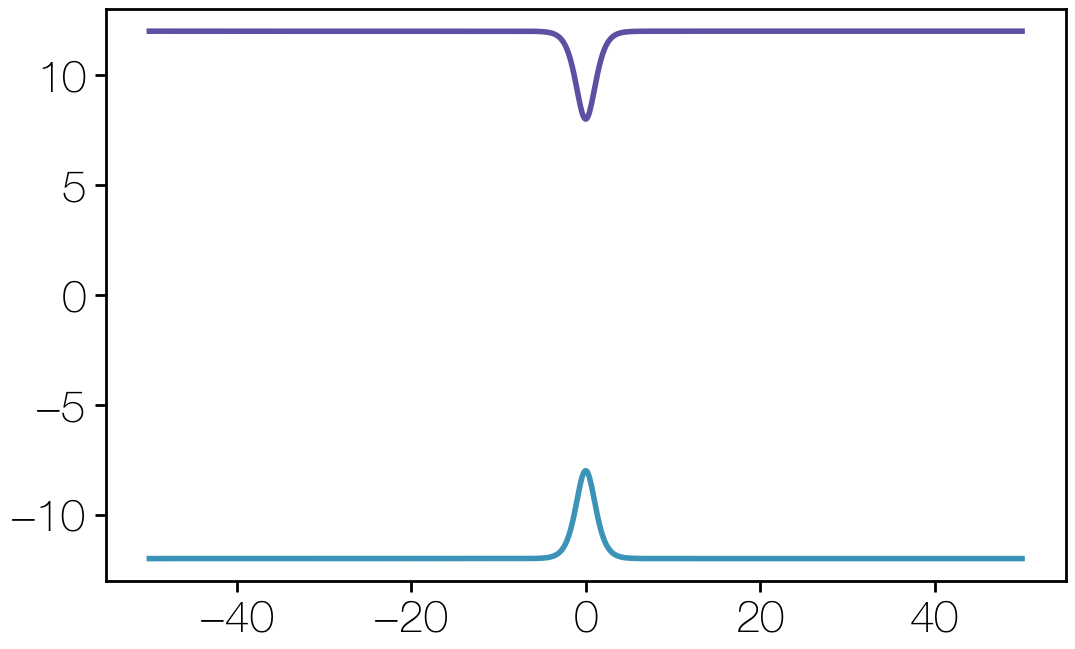

In [24]:
z = np.linspace(-L/2,L/2,1000)
Rz = R(z,L,-4,1.5,12)
plt.plot(z,Rz)
plt.plot(z,-Rz)
plt.ylim(-13,13)

In [25]:
Δz = z[1]-z[0]
R̂z = np.fft.rfft(Rz)*Δz

k = 2*π*np.fft.rfftfreq(z.size,Δz)
kF = 0.25*π

(-10.0, 10.0)

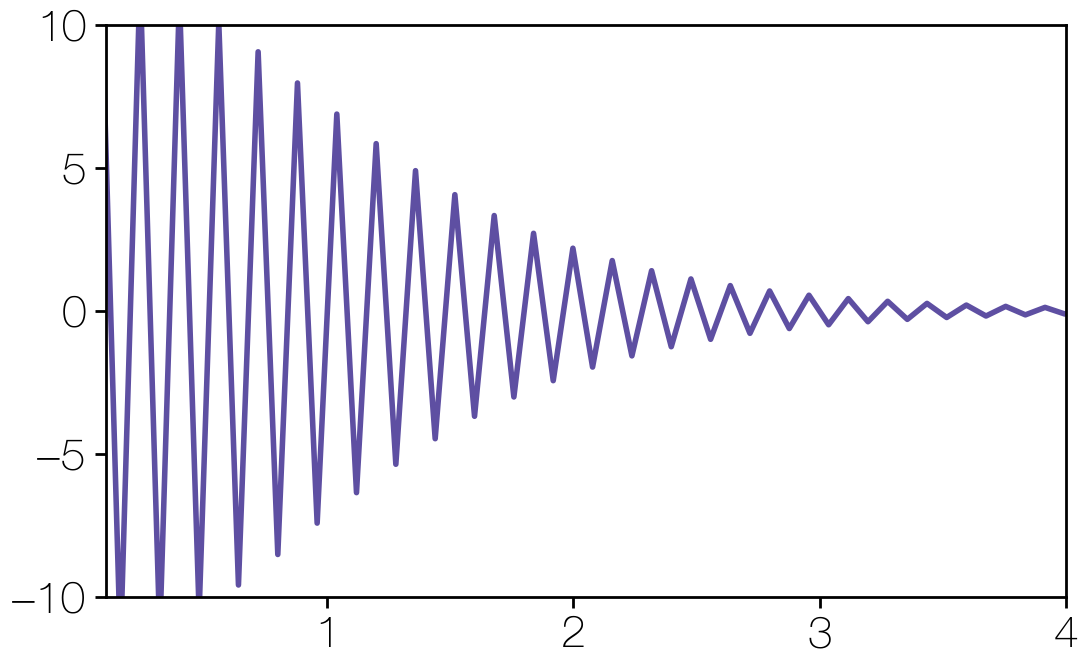

In [26]:
plt.plot(k/kF,np.real(R̂z))
plt.xlim(0.1,4)
plt.ylim(-10,10)

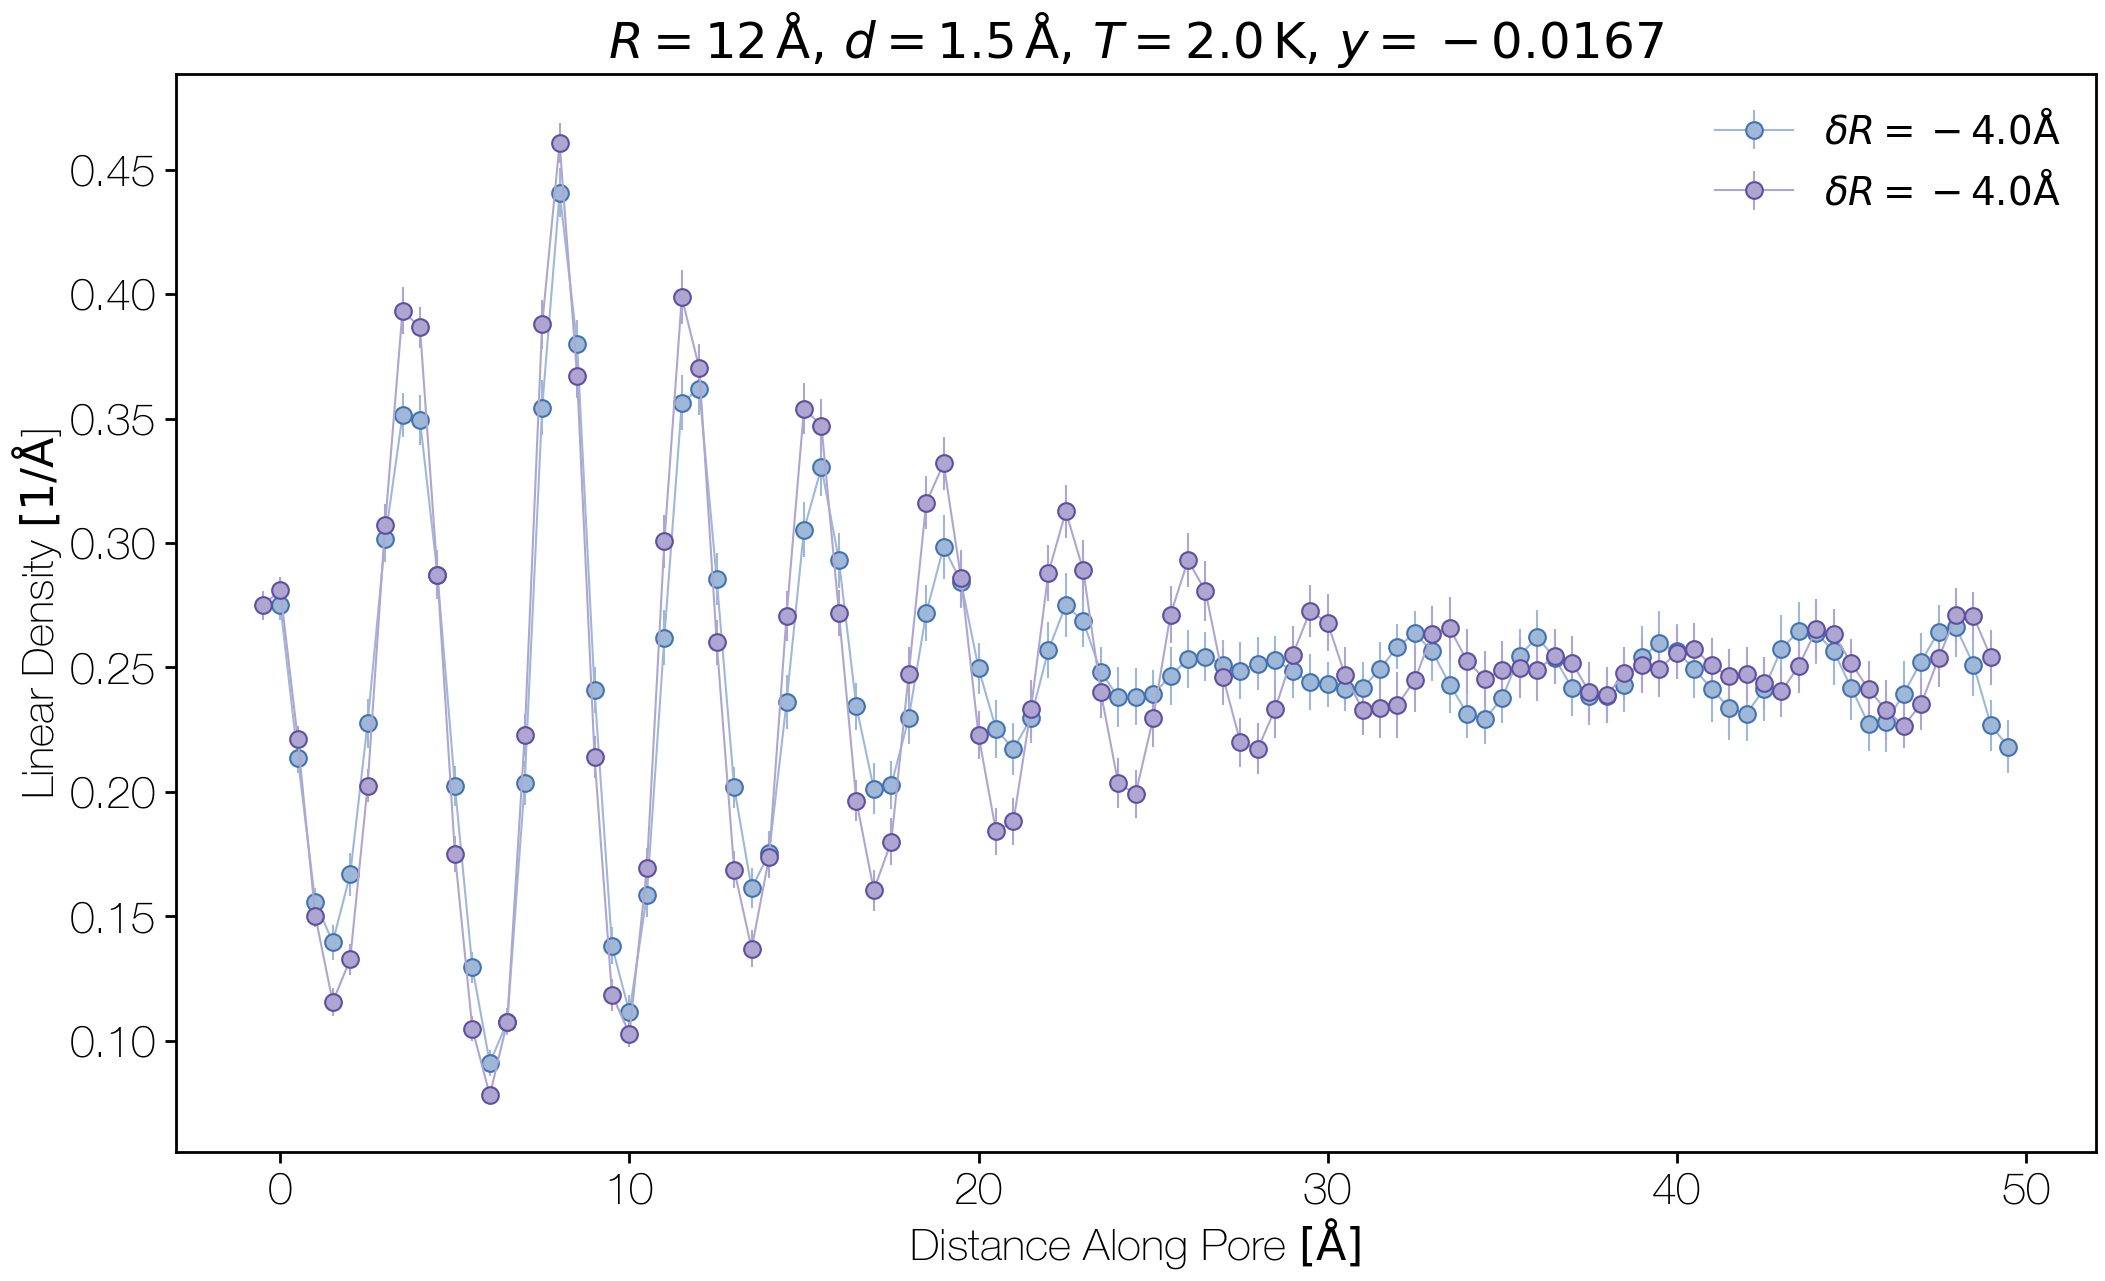

In [27]:
pore_id =5
#y = 0
#if not y:
#    y = 0
plt.style.reload_library()
N = len(ρ[pore_id][:,0])
with plt.style.context(('notebook')):

    plt.figure(figsize=(12,7))

    plt.errorbar(ρ[pore_id][100:200,0],ρ[pore_id][100:200,1],yerr=ρ[pore_id][100:200,2], markeredgecolor=colors[pore_id], 
                 markeredgewidth=0.75, markerfacecolor=col.get_alpha_hex(colors[pore_id],0.5),
                 color=col.get_alpha_hex(colors[pore_id],0.5), elinewidth=0.75, linewidth=0.75, 
                 marker='o', markersize=6, label=r'$\delta R = %4.1f \mathrm{\AA}$'%δR[pore_id])
    
    plt.errorbar(ρ[pore_id][99:199,0],ρ[pore_id][100:0:-1,1],yerr=ρ[pore_id][100:0:-1,2], markeredgecolor=colors[pore_id+1], 
                 markeredgewidth=0.75, markerfacecolor=col.get_alpha_hex(colors[pore_id+1],0.5),
                 color=col.get_alpha_hex(colors[pore_id+1],0.5), elinewidth=0.75, linewidth=0.75, 
                 marker='o', markersize=6, label=r'$\delta R = %4.1f \mathrm{\AA}$'%δR[pore_id])
    
    #plt.plot(m_x_R,make_fit_ρ(K,a,y)(m_x_R,*pR), label='Friedel Osc.', color=colors[pore_id], 
    #         linewidth=3, zorder=20)
    
    plt.legend()
    plt.title(r'$R = 12\, \mathrm{\AA},\, d = 1.5\, \mathrm{\AA},\, T = 2.0\, \mathrm{K},\, y = %8.4f$' % y)

    #plt.text(-43.5,0.15,r"$K = %4.1f$" % K, fontsize=18)
    #plt.text(-48,0.135,r"$\hbar v \rho_0 = %4.2f\, \mathrm{K}$" % u, fontsize=18)


    plt.ylabel('Linear Density $[1/\mathrm{\AA}$]')
    plt.xlabel('Distance Along Pore $[\mathrm{\AA}]$')
    plt.savefig('Output/Friedel_R_12.0_d_1.5_T_2.0_symmetric_15.png')

## Get the values at the maxima for comparison

In [144]:
from scipy.signal import argrelextrema

extrema = []
for i in range(num_pores):
    extrema.append(argrelextrema(ρ[i][:,1], np.greater)[0])

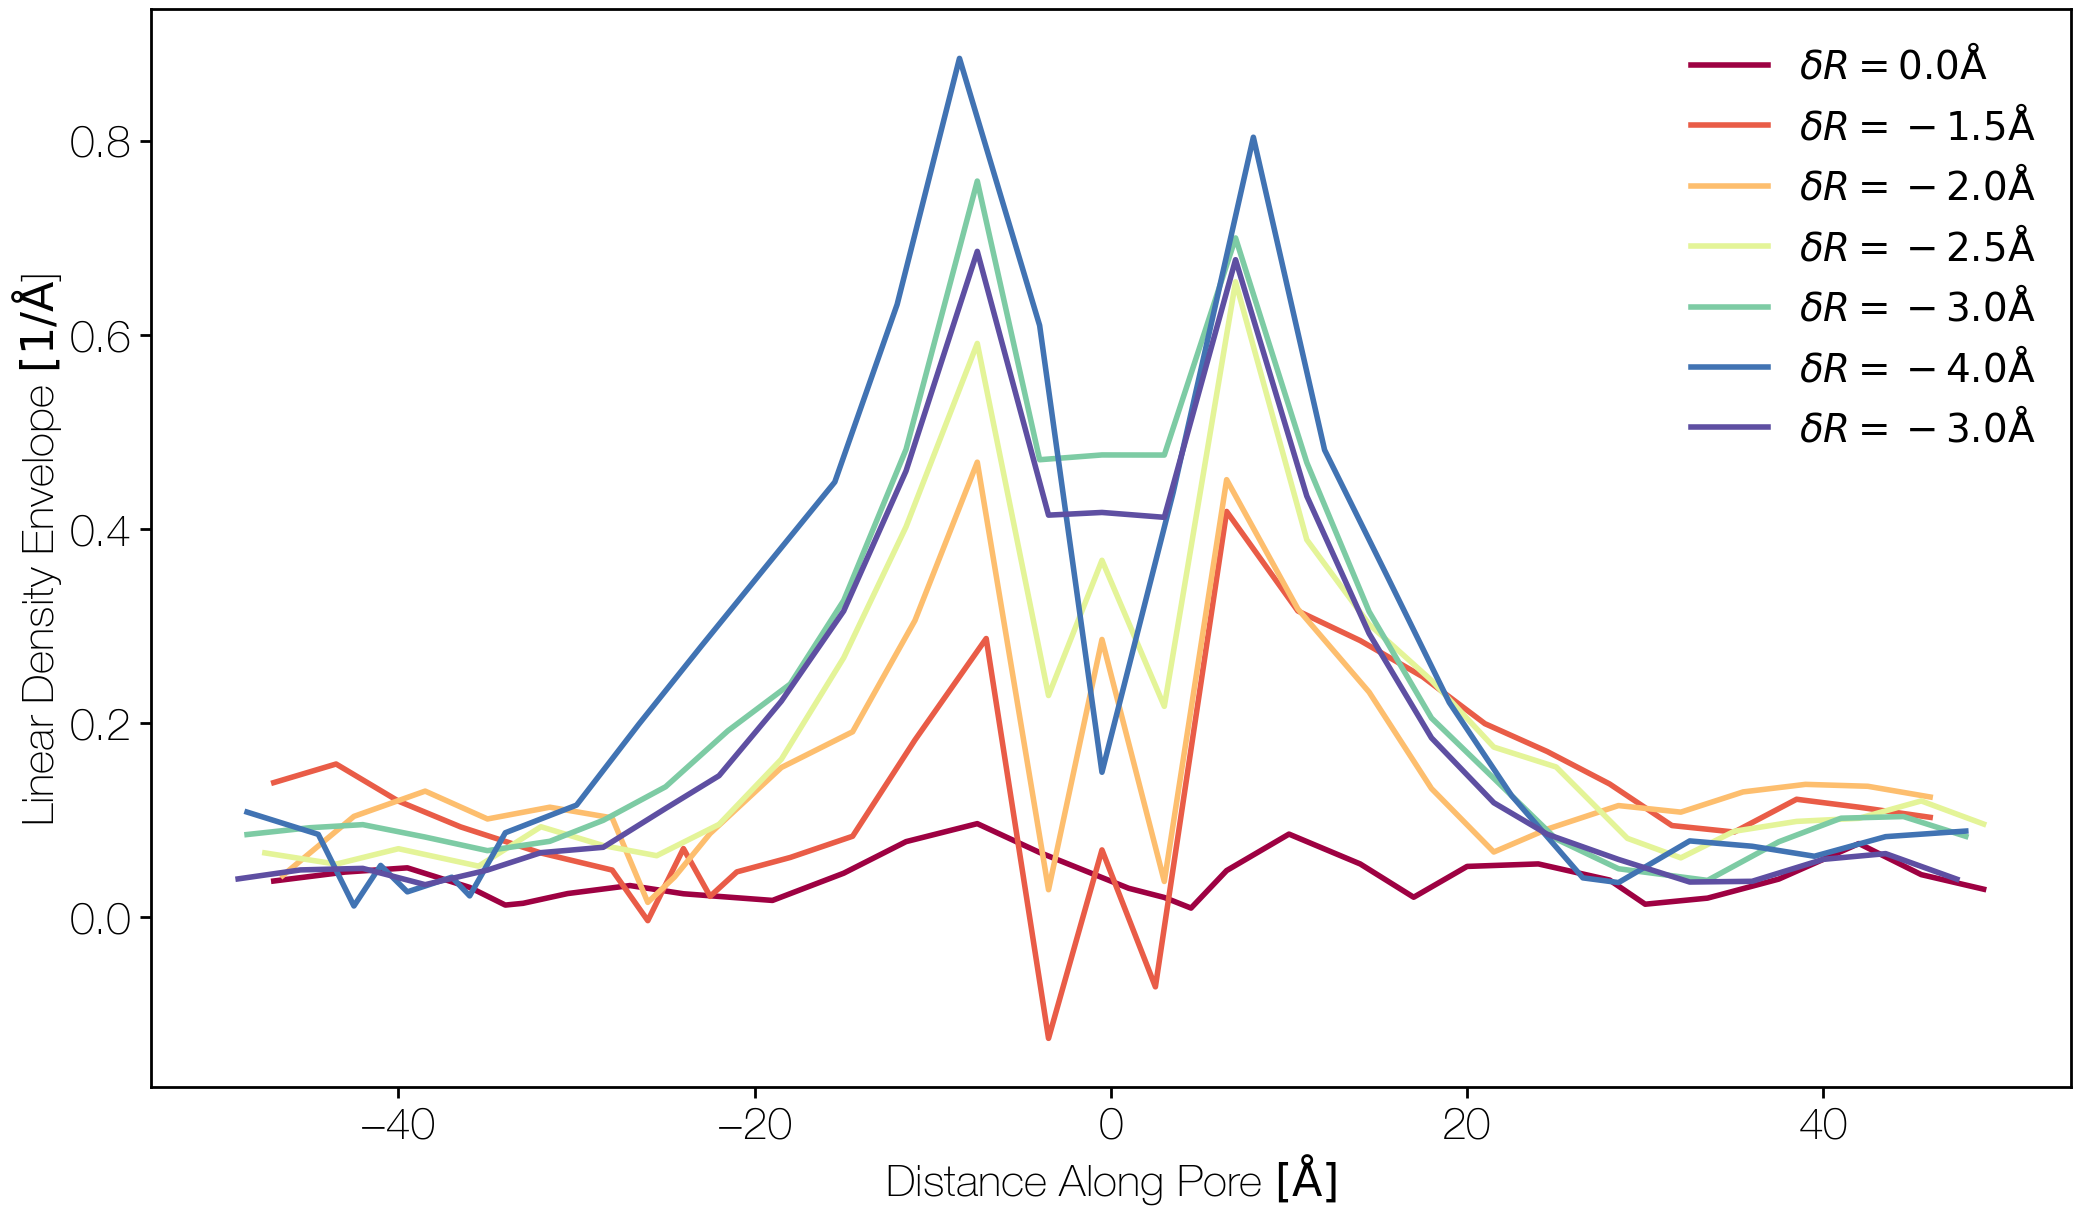

In [146]:
plt.style.reload_library()
ρₒ[pore_id]
with plt.style.context(('notebook')):
    plt.figure(figsize=(12,7))
    for i in range(num_pores):
        plt.plot(ρ[i][extrema[i],0],ρ[i][extrema[i],1]/ρₒ[i]-1,label=r'$\delta R = %4.1f \mathrm{\AA}$'%δR[i], 
                color=colors[i], linewidth=2)

    plt.ylabel('Linear Density Envelope $[1/\mathrm{\AA}$]')
    plt.xlabel('Distance Along Pore $[\mathrm{\AA}]$')
    plt.legend()
    
    plt.savefig('Output/densit_profile_R_12.0_d_1.5_T_2.0.png')

In [24]:
1.6*0.8*1.67*1.38

2.9498880000000005

In [25]:
π**2/(1.6*0.8*1.67*1.38)

3.3457556358374814